In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import geopandas as gpd
import country_converter as coco
from matplotlib import pyplot as plt
from itertools import cycle, islice

save_figs_flag = True
EDITIONS = ["2000", "2001", "2002", "2003", "2004",
            "2005", "2006", "2007", "2008", "2009", 
            "2010", "2011", "2012", "2013", "2014",
            "2015", "2016", "2017", "2018", "2019",
            "2020", "2021", "2022", "2023", "2024"]

COLOR_LIST = ['darkblue', 'mediumblue', 'cornflowerblue', 
              'darkred', 'red', 'tomato', 'lightsalmon']

In [2]:
df = pd.read_csv("data/ismir_all_papers.csv")
un_cat = pd.read_csv("data/UN_categorization.csv")[['ISO Code', 'Economic Category']]
iso_to_category = dict(zip(un_cat['ISO Code'], un_cat['Economic Category']))

def map_countries_to_categories(iso_list):
    return ', '.join([iso_to_category.get(iso.strip(), 'Unknown') for iso in iso_list.split(',')])

df['Affiliation country'] = df['Authors with Affiliations'].apply(lambda x: ', '.join([entry.split('>')[1] for entry in x.split(';')]))
df['Affiliation type'] = df['Authors with Affiliations'].apply(lambda x: ', '.join([entry.split('>')[-1] for entry in x.split(';')]))
df['UN Categories'] = df['Affiliation country'].apply(map_countries_to_categories)

i = 1000
print(df.iloc[i]['Authors with Affiliations'])
print(df.iloc[i]['Affiliation country'])
print(df.iloc[i]['Affiliation type'])

df.head()


Balaji Thoshkahna+Indian Institute of Science>IND>education;Francois Xavier Nsabimana+Fraunhofer Institute of Digital Media Technology>DEU>facility;K.R. Ramakrishnan+Indian Institute of Science>IND>education
IND, DEU, IND
education, facility, education


,conference_index,Authors,Title,Year,Link,Authors with Affiliations,Abstract,first_country,first_aff_cat,first_aff_cat_UN,...,abstract_tsne_2d,title_tsne_3d,abstract_tsne_3d,title_umap_2d,abstract_umap_2d,title_umap_3d,abstract_umap_3d,Affiliation country,Affiliation type,UN Categories
0,15,Perfecto Herrera-Boyer;Xavier Amatriain;Eloi B...,Towards Instrument Segmentation for Music Cont...,2000,https://doi.org/10.5281/zenodo.1416768,Perfecto Herrera+Audiovisual Institute - Pompe...,A system capable of describing the musical con...,ESP,education,Developed economies,...,"[3.1705327, -12.8276415]","[20.477497, -4.0411277, -18.56773]","[13.273217, 0.19922031, -8.516665]","[8.600878, 8.404931]","[9.565406, 2.2991855]","[12.615438, 9.365253, -1.9493338]","[10.903186, 7.1374574, 11.25885]","ESP, ESP, ESP, ESP","education, education, education, education","Developed economies, Developed economies, Deve..."
1,33,Alexandra L. Uitdenbogerd;Justin Zobel,Music Ranking Techniques Evaluated.,2000,https://doi.org/10.5281/zenodo.1414990,Alexandra L. Uitdenbogerd+RMIT University>AUS>...,Several techniques have been proposed for matc...,AUS,education,Developed economies,...,"[23.650671, -12.440616]","[-8.786249, 8.753312, -7.6994915]","[7.7473493, -10.501352, 8.463312]","[13.837959, 7.1572523]","[11.020011, -0.25071612]","[15.7918415, 7.986932, -1.1284965]","[11.289102, 5.079816, 14.183715]","AUS, AUS","education, education","Developed economies, Developed economies"
2,32,Alexandra L. Uitdenbogerd,"Music IR: Past, Present, and Future.",2000,https://doi.org/10.5281/zenodo.1417545,Alexandra L. Uitdenbogerd+RMIT University>AUS>...,Music Information Retrieval has a longer histo...,AUS,education,Developed economies,...,"[24.683052, 1.216263]","[-11.697868, 21.503635, -5.8990464]","[3.667515, -6.047719, 8.387314]","[14.030799, 6.2451067]","[11.492729, 0.28146976]","[15.834118, 7.159758, -1.6523566]","[11.634125, 5.052472, 13.80562]","AUS, AUS, AUS","education, education, education","Developed economies, Developed economies, Deve..."
3,29,Jochen Schimmelpfennig;Frank Kurth,MCML - Music Contents Markup Language.,2000,https://doi.org/10.5281/zenodo.1415526,Jochen Schimmelpfennig+University of Bonn>DEU>...,We present an XML-based description interface ...,DEU,education,Developed economies,...,"[5.692757, 27.776169]","[-0.7090279, 17.623865, -14.180176]","[-3.1960096, -8.358783, 20.134007]","[12.5179205, 5.7732697]","[12.436563, -0.2819016]","[14.523515, 6.8880763, -1.1454129]","[11.121715, 3.8818424, 12.963449]","DEU, DEU","education, education","Developed economies, Developed economies"
4,28,Perry Roland,XML4MIR: Extensible Markup Language for Music ...,2000,https://doi.org/10.5281/zenodo.1417167,Perry Roland+University of Virginia>USA>education,This paper evaluates the role of standards in ...,USA,education,Developed economies,...,"[6.5095024, 28.41491]","[-1.166108, 15.790353, -15.373351]","[-1.5860064, -7.730139, 21.785463]","[12.882296, 5.9628572]","[12.513417, -0.23882104]","[14.76004, 7.058861, -1.653147]","[11.271783, 3.7831059, 12.969235]",USA,education,Developed economies


In [3]:
df['Western_flag'] = df['Abstract'].str.lower().str.contains('western').astype(int)

print(df['Western_flag'].value_counts())
print(df['Western_flag'].value_counts() / df.shape[0])

Western_flag
0    2352
1     106
Name: count, dtype: int64
Western_flag
0    0.956876
1    0.043124
Name: count, dtype: float64


['Developed economies' 'Developing economies' 'Unknown'
 'Economies in transition']


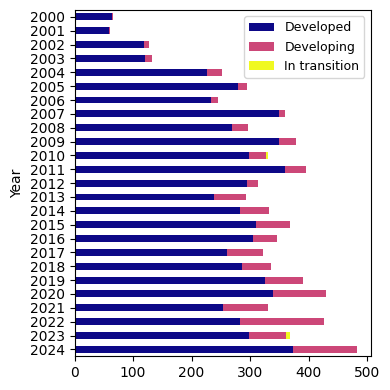

Category
Developed economies        85.712425
Developing economies       14.157333
Economies in transition     0.130242
dtype: float64

In [4]:
# plot developing economies through time

venues = ['USA', 'USA', 'FRA', 'USA', 'ESP', 'GBR', 
          'CAN', 'AUT', 'USA', 'JPN', 'NLD', 'USA', 
          'PRT', 'BRA', 'TWN', 'ESP', 'USA', 'CHN', 
          'FRA', 'NLD', 'CAN (o)', 'Online', 'IND (h)', 
          'ITA (h)', 'USA (h)']

print(df['UN Categories'].str.split(',').explode().str.strip().unique())

def count_categories(df):
    category_counts = []
    
    for _, row in df.iterrows():
        year = row['Year']
        try: 
            categories = row['UN Categories'].split(', ')
        except:
            categories = ['Unknown']
        
        filtered_categories = [cat.strip() for cat in categories if cat != 'Unknown']

        category_counts.append(pd.DataFrame({'Year': year, 'Category': filtered_categories}))

    category_df = pd.concat(category_counts)
    return category_df.groupby(['Year', 'Category']).size().unstack(fill_value=0)

# Get category counts per year
category_counts = count_categories(df)

category_counts.plot(kind='barh', stacked=True, figsize=(4, 4), colormap='plasma')
custom_labels = ['Developed', 'Developing', 'In transition']
plt.legend(labels=custom_labels, fontsize=9, loc='upper right')
plt.gca().invert_yaxis()
plt.tight_layout()
if save_figs_flag:
    plt.savefig("figs/aff_un_type.pdf", format="pdf", bbox_inches="tight", dpi=300)
plt.show()

# percentages of participation
category_counts.sum() * 100/ category_counts.sum().sum()

In [5]:
def count_publications_by_country(country_code):
    # Filter rows where the country code appears in the Affiliation country column
    mask = df['Affiliation country'].str.contains(country_code, na=False)
    count = mask.sum()
    
    return count

# Example usage
country = 'IND'
publications = count_publications_by_country(country)
print(f"Number of publications with authors from {country}: {publications}")

# You can also get all publications details if needed
publications_details = df[df['Affiliation country'].str.contains(country, na=False)]
print(f"\nExample of first few publications from {country}:")
print(publications_details[['Year', 'Title', 'Affiliation country']].head())



Number of publications with authors from IND: 43

Example of first few publications from IND:
      Year                                              Title  \
959   2011  A Postprocessing Technique for Improved Harmon...   
1000  2011  A Transient Detection Algorithm for Audio Usin...   
1113  2012  Detecting Melodic Motifs from Audio for Hindus...   
1172  2013  Inter and Intra Item Segmentation of Continuou...   
1174  2013    Motif Spotting in an Alapana in Carnatic Music.   

     Affiliation country  
959             IND, IND  
1000       IND, DEU, IND  
1113       IND, IND, IND  
1172            IND, IND  
1174  IND, IND, IND, IND  


In [6]:
type_e = 0
type_f = 0
type_c = 0
type_ef = 0
type_ec = 0
type_fc = 0
type_efc = 0

type_lists = []

typeDict = {}
countryDict = {}

country_names = set()

for ed in EDITIONS:
    # print("###",ed)

    dfISMIRyear = df[df["Year"] == int(ed)]
    countryDict[ed] = {}

    for index, row in dfISMIRyear.iterrows():

        aff_types = [x.strip() for x in row["Affiliation type"].split(",")]
        aff_countries = [x.strip() for x in row["Affiliation country"].split(",")]

        # Check list lenghts
        it = iter([aff_types,aff_countries])
        the_len = len(next(it))
        if not all(len(l) == the_len for l in it):
             raise ValueError('not all lists have same length!')

        # Aff types
        if len(set(aff_types)) == 1:
            if "education" in aff_types:
                type_e += 1
            elif "facility" in aff_types:
                type_f += 1
            elif "company" in aff_types:
                type_c += 1
        elif len(set(aff_types)) == 2:
            if "education" in aff_types and "facility" in aff_types:
                type_ef += 1
            elif "education" in aff_types and "company" in aff_types:
                type_ec += 1
            elif "facility" in aff_types and "company" in aff_types:
                type_fc += 1
        elif len(set(aff_types)) == 3:
            type_efc += 1


        # Aff countries
        if len(set(aff_countries)) == 1:
            co = next(iter(set(aff_countries)))
            country_names.add(co)
            if co not in countryDict[ed]:
                countryDict[ed][co] = {"sc":1, "mc":0}
            else:
                countryDict[ed][co]["sc"] += 1
        else:
            for co in set(aff_countries):
                country_names.add(co)
                if co not in countryDict[ed]:
                    countryDict[ed][co] = {"sc":0, "mc":1}
                else:
                    countryDict[ed][co]["mc"] += 1



    type_list = [type_e, type_f, type_c, type_ef, type_ec, type_fc, type_efc]
    type_list_perc = [round(x*100/np.sum(type_list), 2) for x in type_list]

    typeDict[ed] = type_list_perc
    
    # print(type_list)
    # print(type_list_perc)
    # print(len(dfISMIRyear), len(countryDict[ed]))

CountryCountDict = {}
for co in country_names:
    if co == 'unknown':
        continue
    CountryCountDict[co] = [0,0]
    for ed in EDITIONS:
        if co in countryDict[ed]:
            CountryCountDict[co][0] += countryDict[ed][co]['sc']
            CountryCountDict[co][1] += countryDict[ed][co]['mc']

# Sort Dict Countries
temp1 = {val: sum(int(idx) for idx in key) 
           for val, key in CountryCountDict.items()}
# using sorted to perform sorting as required
temp2 = sorted(temp1.items(), key = lambda ele : temp1[ele[0]], reverse=True)
# rearrange into dictionary
CountryCountDictSorted = {key: CountryCountDict[key] for key, val in temp2 if key!="Unknown"}

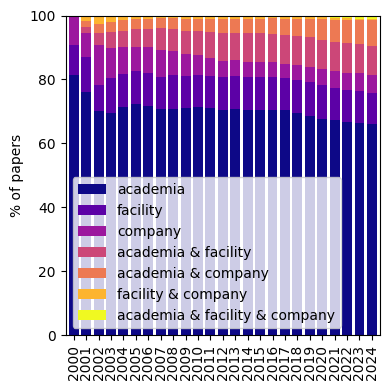

In [7]:
def plot_aff_type(typeDict):
    """
    """
    aff_df = pd.DataFrame.from_dict(typeDict, orient='index')
    #my_colors = list(islice(cycle(COLOR_LIST), None, len(aff_df)))
    #aff_df.plot(kind='bar', stacked=True, color=my_colors, width=.8)
    aff_df.plot(kind='bar', stacked=True, colormap='plasma', width=.8, figsize=(4, 4))


    plt.ylabel('% of papers')
    plt.legend(['academia','facility','company',
                'academia & facility','academia & company',
                'facility & company','academia & facility & company'])

    plt.title('')
    plt.ylim([0,100])
    plt.xticks(np.arange(25), EDITIONS, rotation=90, ha='center')
    plt.tight_layout()
    if save_figs_flag:
        plt.savefig("figs/aff_type.pdf", format="pdf", bbox_inches="tight", dpi=300)
    plt.show()


plot_aff_type(typeDict)

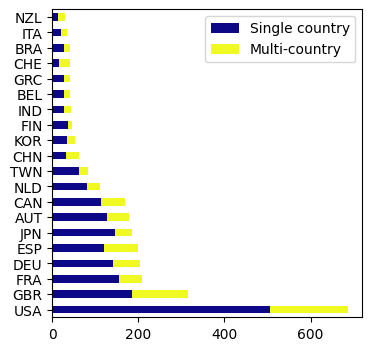

In [8]:
def take(n, iterable):
    """Return the first n items of the iterable as a list."""
    return list(islice(iterable, n))
    
def plot_aff_country():
    """
    """
    aff_df = pd.DataFrame.from_dict(CountryCountDictSorted, orient='index')
    aff_df.plot(kind='barh', stacked=True, colormap='plasma', figsize=(4, 4))

    # plt.ylabel('number of papers')
    plt.legend(['Single country', 'Multi-country'])
    plt.title('')
    plt.ylim([-.5,19.5])
    plt.yticks(np.arange(20), 
                         [key for key, val in take(20,CountryCountDictSorted.items())], 
                         rotation=0)
    if save_figs_flag:
        plt.savefig("figs/top_countries.pdf", format="pdf", bbox_inches="tight", dpi=300)
    plt.show()


plot_aff_country()


Dhekelia Sovereign Base Area not found in regex
US Naval Base Guantanamo Bay not found in regex
Siachen Glacier not found in regex
Baykonur Cosmodrome not found in regex
Akrotiri Sovereign Base Area not found in regex
Southern Patagonian Ice Field not found in regex
Bir Tawil not found in regex
Indian Ocean Territories not found in regex
Coral Sea Islands not found in regex
Spratly Islands not found in regex
Clipperton Island not found in regex
Ashmore and Cartier Islands not found in regex
Bajo Nuevo Bank (Petrel Is.) not found in regex
Serranilla Bank not found in regex
Scarborough Reef not found in regex


                      country country_code  \
0                   Indonesia          IDN   
1                    Malaysia          MYS   
2                       Chile          CHL   
3                     Bolivia          BOL   
4                        Peru          PER   
..                        ...          ...   
237                     Palau          PLW   
238                      Guam          GUM   
239  Northern Mariana Islands          MNP   
240                   Bahrain          BHR   
241               Macao S.A.R          MAC   

                                              geometry iso2_code Country  \
0    MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...        ID     NaN   
1    MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...        MY     MYS   
2    MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...        CL     NaN   
3    POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...        BO     NaN   
4    MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...        PE   

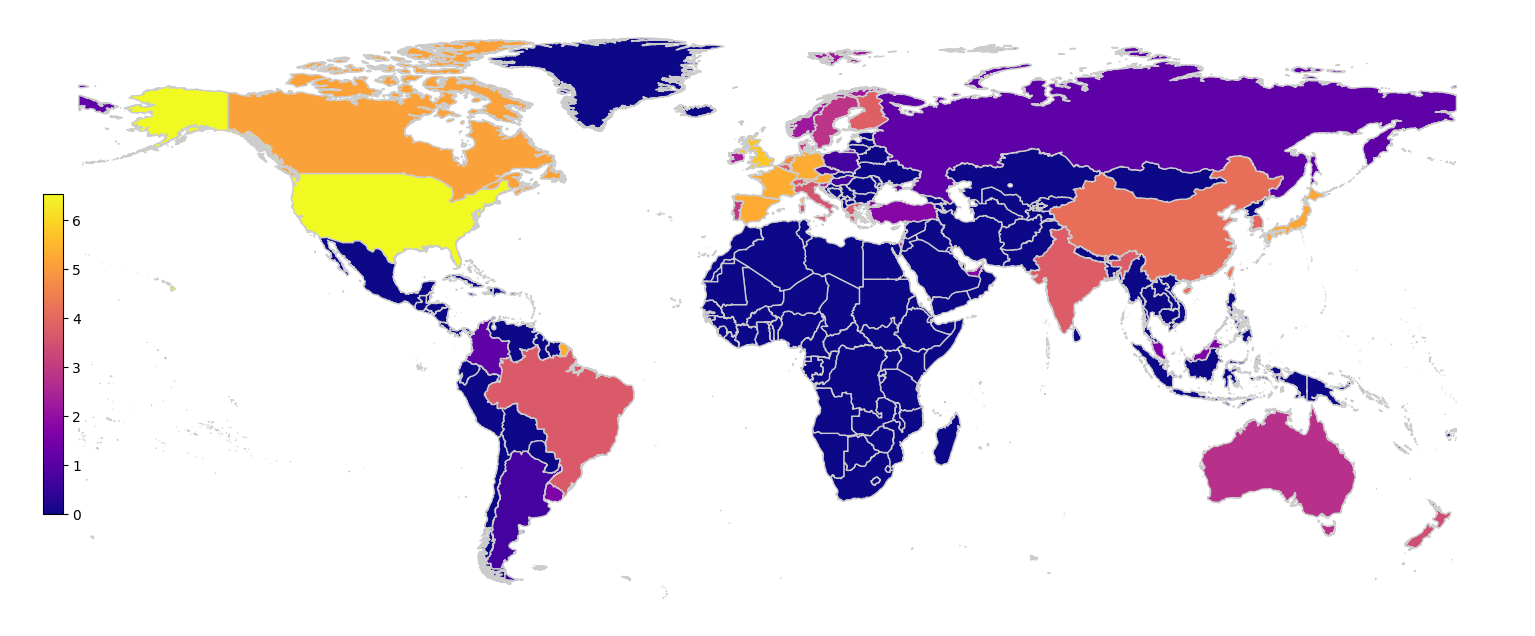

In [9]:
def plot_worldmap():
    """
    """
    # Setting the path to the shapefile
    SHAPEFILE = 'data/worldmap/ne_10m_admin_0_countries.shp'
    # Read shapefile using Geopandas
    geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]
    # Rename columns.
    geo_df.columns = ['country', 'country_code', 'geometry']
    geo_df = geo_df.drop(geo_df.loc[geo_df['country'] == 'Antarctica'].index)


    iso3_codes = geo_df['country'].to_list()
    # Convert to iso3_codes
    iso2_codes_list = coco.convert(names=iso3_codes, to='ISO2', not_found='NULL')
    # Add the list with iso2 codes to the dataframe
    geo_df['iso2_code'] = iso2_codes_list
    # There are some countries for which the converter could not find a country code. 
    # We will drop these countries.
    geo_df = geo_df.drop(geo_df.loc[geo_df['iso2_code'] == 'NULL'].index)


    CountryCountDictPlot = {key: val for key, val in temp2 if key!="unknown"}
    country_df = pd.DataFrame(list(CountryCountDictPlot.items()), columns=['Country', 'Value'])

    merged_df = pd.merge(left=geo_df, right=country_df, how='left', left_on='country_code', right_on='Country')

    merged_df["Value"].fillna(1, inplace=True)

    merged_df["Value"] = np.log(merged_df["Value"])
    print(merged_df)

    col = 'Value'
    vmin = merged_df[col].min()
    vmax = merged_df[col].max()
    cmap = 'plasma'
    # Create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(20, 8))
    # Remove the axis
    ax.axis('off')
    merged_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)

    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
    # Empty array for the data range
    sm._A = []
    # Add the colorbar to the figure
    cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
    cbar = fig.colorbar(sm, cax=cbaxes)

    if save_figs_flag:
        plt.savefig("figs/worldmap_log.pdf", format="pdf", bbox_inches="tight")
    plt.show()


plot_worldmap()

## Measuring Diversity and Inequality

This section uses the data of affiliation country to measure inequality (based on the Gini index) and diversity (based on Shannon's entropy and Pielou Evenness index). We take into account a list of all countries in the list of ISO3166 country codes to calculate Gini. 

In [10]:
all_ismir = df['Affiliation country'].dropna().str.split(',').explode().str.strip().unique().tolist()
all_ismir.remove('Unknown')
print(all_ismir)

full_list = ['AFG', 'ALA', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'AIA', 'ATA', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA', 'BVT', 'BRA', 'IOT', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'CXR', 'CCK', 'COL', 'COM', 'COG', 'COD', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FLK', 'FRO', 'FJI', 'FIN', 'FRA', 'GUF', 'PYF', 'ATF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP', 'GUM', 'GTM', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HMD', 'VAT', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'PRK', 'KOR', 'XKX', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MKD', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MTQ', 'MRT', 'MUS', 'MYT', 'MEX', 'FSM', 'MDA', 'MCO', 'MNG', 'MNE', 'MSR', 'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL', 'NLD', 'NCL', 'NZL', 'NIC', 'NER', 'NGA', 'NIU', 'NFK', 'MNP', 'NOR', 'OMN', 'PAK', 'PLW', 'PSE', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'PCN', 'POL', 'PRT', 'PRI', 'QAT', 'REU', 'ROU', 'RUS', 'RWA', 'BLM', 'SHN', 'KNA', 'LCA', 'MAF', 'SPM', 'VCT', 'WSM', 'SMR', 'STP', 'SAU', 'SEN', 'SRB', 'SYC', 'SLE', 'SGP', 'SXM', 'SVK', 'SVN', 'SLB', 'SOM', 'ZAF', 'SGS', 'SSD', 'ESP', 'LKA', 'SDN', 'SUR', 'SJM', 'SWZ', 'SWE', 'CHE', 'SYR', 'TWN', 'TJK', 'TZA', 'THA', 'TLS', 'TGO', 'TKL', 'TON', 'TTO', 'TUN', 'TUR', 'TKM', 'TCA', 'TUV', 'UGA', 'UKR', 'ARE', 'GBR', 'USA', 'UMI', 'URY', 'UZB', 'VUT', 'VEN', 'VNM', 'VGB', 'VIR', 'WLF', 'ESH', 'YEM', 'ZMB', 'ZWE']
print(full_list)

countries = df[df['Year'] == 2001]['Affiliation country'].dropna().str.split(',').explode().str.strip()
country_counts = countries.value_counts().drop('unknown', errors='ignore').reindex(all_ismir, fill_value=0)
import numpy as np
array = np.sort(np.array(country_counts))[::-1]
index = np.arange(1, array.shape[0] + 1)
print(array, index)

['ESP', 'AUS', 'DEU', 'USA', 'GBR', 'NZL', 'FIN', 'MYS', 'JPN', 'GRC', 'FRA', 'POL', 'TWN', 'ITA', 'IRL', 'CAN', 'BEL', 'CHN', 'NLD', 'SVN', 'AUT', 'KOR', 'SGP', 'NOR', 'ISR', 'CHE', 'BRA', 'ROU', 'DNK', 'PRT', 'VEN', 'HUN', 'OMN', 'URY', 'HKG', 'SRB', 'IND', 'IRN', 'TUR', 'SWE', 'CYP', 'ARE', 'RUS', 'CZE', 'COL', 'EST', 'ARG', 'VNM']
['AFG', 'ALA', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'AIA', 'ATA', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA', 'BVT', 'BRA', 'IOT', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'CXR', 'CCK', 'COL', 'COM', 'COG', 'COD', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FLK', 'FRO', 'FJI', 'FIN', 'FRA', 'GUF', 'PYF', 'ATF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP', 'GUM', 'GTM', 'GGY', 'GIN', 'GNB', 'GUY

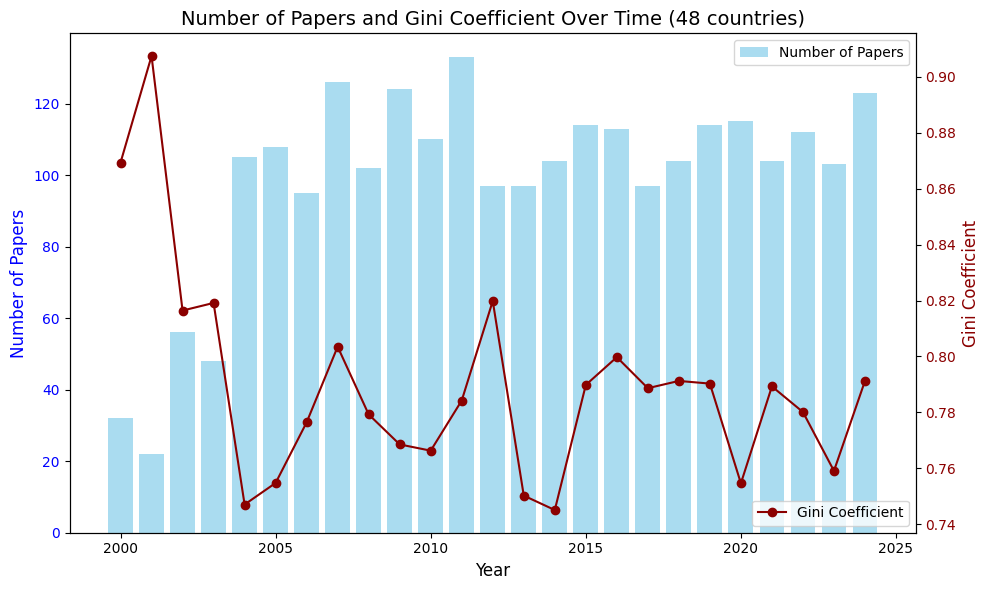

In [11]:
import seaborn as sns
import numpy as np


def gini(array):
    array = np.array(array, dtype=np.float64)
    
    if np.any(array < 0):
        raise ValueError('Negative values!')
    
    if np.sum(array) == 0:
        return 0.0  # If all values are zero, return 0

    array = np.sort(array)  
    cumulative = np.cumsum(array)
    sum_y = cumulative[-1]

    n = array.shape[0]
    gini_coeff = (2 * np.sum((np.arange(1, n + 1) * array)) / sum_y - (n + 1)) / n
    return gini_coeff

gini_data = []
for year, group in df.groupby('Year'):
    countries = group['Affiliation country'].dropna().str.split(',').explode().str.strip()
    # using full list of 48 countries to calculate Gini 
    country_counts = countries.value_counts().drop('unknown', errors='ignore').reindex(all_ismir, fill_value=0)
    gini_coeff = gini(country_counts)
    gini_data.append((year, gini_coeff))

gini_df = pd.DataFrame(gini_data, columns=['Year', 'Gini_Coefficient'])
yearly_counts = df['Year'].value_counts().sort_index()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(yearly_counts.index, yearly_counts.values, color='skyblue', alpha=0.7, label='Number of Papers')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Papers', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title(f'Number of Papers and Gini Coefficient Over Time ({len(all_ismir)} countries)', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(gini_df['Year'], gini_df['Gini_Coefficient'], color='darkred', marker='o', label='Gini Coefficient')
ax2.set_ylabel('Gini Coefficient', fontsize=12, color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

plt.tight_layout()
if save_figs_flag:
    plt.savefig(f"figs/gini_{len(all_ismir)}countries.pdf", format="pdf", bbox_inches="tight")
plt.show()

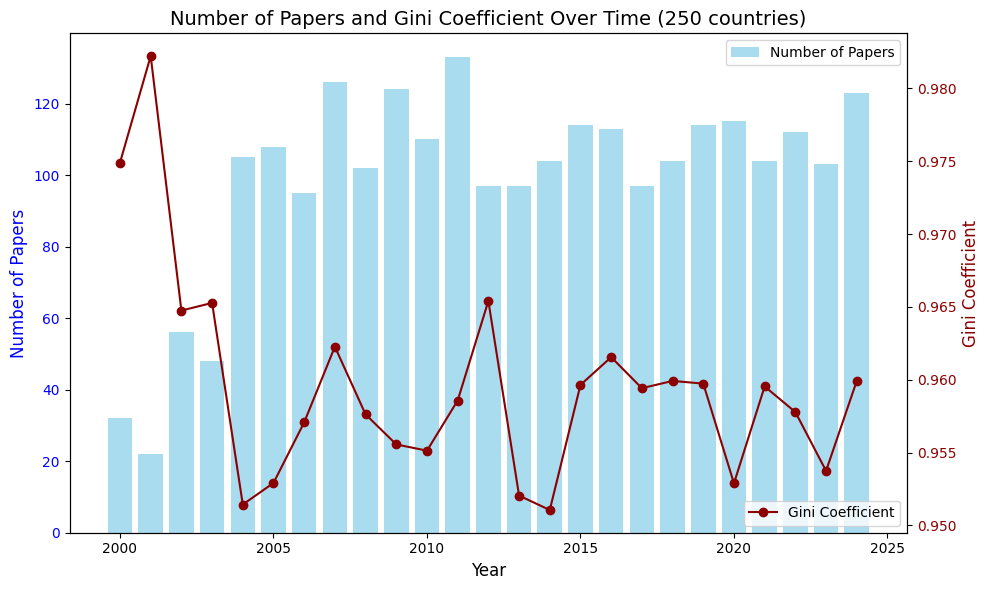

In [12]:
gini_data = []
for year, group in df.groupby('Year'):
    countries = group['Affiliation country'].dropna().str.split(',').explode().str.strip()
    # using full list of 250 countries to calculate Gini 
    country_counts = countries.value_counts().drop('unknown', errors='ignore').reindex(full_list, fill_value=0)
    gini_coeff = gini(country_counts)
    gini_data.append((year, gini_coeff))

gini_df = pd.DataFrame(gini_data, columns=['Year', 'Gini_Coefficient'])
yearly_counts = df['Year'].value_counts().sort_index()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(yearly_counts.index, yearly_counts.values, color='skyblue', alpha=0.7, label='Number of Papers')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Papers', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title(f'Number of Papers and Gini Coefficient Over Time ({len(full_list)} countries)', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(gini_df['Year'], gini_df['Gini_Coefficient'], color='darkred', marker='o', label='Gini Coefficient')
ax2.set_ylabel('Gini Coefficient', fontsize=12, color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

plt.tight_layout()
if save_figs_flag:
    plt.savefig(f"figs/gini_{len(full_list)}countries.pdf", format="pdf", bbox_inches="tight")
plt.show()

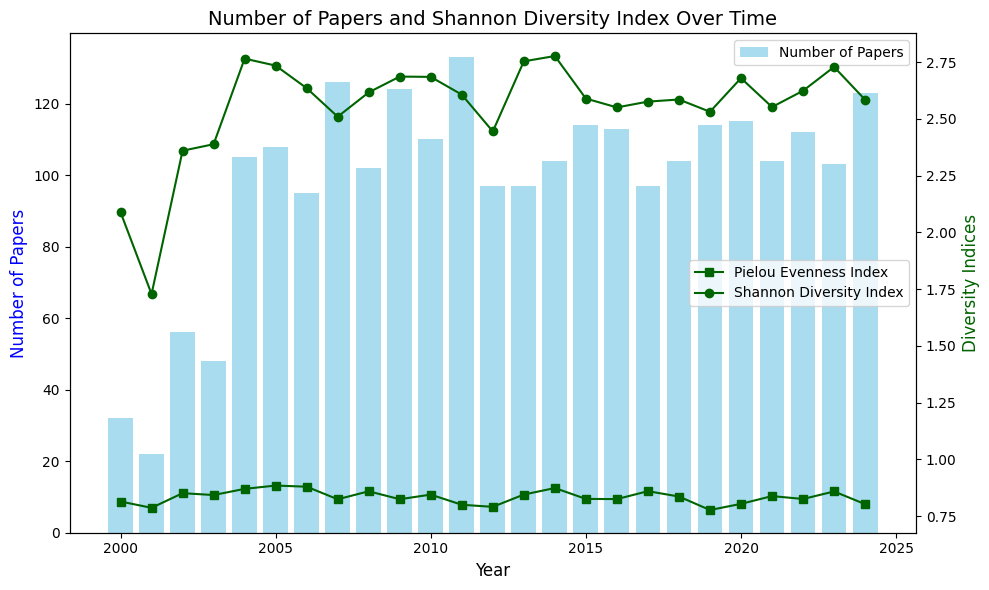

In [13]:
from scipy.stats import entropy

shannon_data = []
for year, group in df.groupby('Year'):
    countries = group['Affiliation country'].dropna().str.split(',').explode().str.strip()
    country_counts = countries.value_counts().drop('unknown', errors='ignore').reindex(all_ismir, fill_value=0)
    S = (country_counts > 0).sum()  # Number of unique countries
    shannon_ent = entropy(country_counts) if S > 0 else np.nan
    # calculate pielou index
    pielou_evenness = shannon_ent / np.log(S) if S > 1 else np.nan
    shannon_data.append((year, shannon_ent, pielou_evenness))

    
shannon_df = pd.DataFrame(shannon_data, columns=['Year', 'Shannon_Diversity_Index', 'Pielou_Evenness'])

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(yearly_counts.index, yearly_counts.values, color='skyblue', alpha=0.7, label='Number of Papers')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Papers', fontsize=12, color='blue')
ax1.tick_params(axis='y')
ax1.set_title('Number of Papers and Shannon Diversity Index Over Time', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(shannon_df['Year'], shannon_df['Pielou_Evenness'], color='darkgreen', marker='s', label='Pielou Evenness Index')
ax2.plot(shannon_df['Year'], shannon_df['Shannon_Diversity_Index'], color='darkgreen', marker='o', label='Shannon Diversity Index')
ax2.set_ylabel('Diversity Indices', fontsize=12, color='darkgreen')
ax2.tick_params(axis='y')

ax1.legend(loc='upper right')
ax2.legend(loc='center right')
plt.tight_layout()
if save_figs_flag:
    plt.savefig("figs/shannon_pielou.pdf", format="pdf", bbox_inches="tight")
plt.show()

Case Gini:
Y=β0+β1*X+ϵ = 1.7938880817112135 + -0.0004146495952138359 X + 0.00018276728258423002
Stats: slope=-0.0004146495952138359, t=-2.2687298807035705, p=0.032981814392567754 -> the model explains 18.28653332543976% of the variance
Case Pielou:
Y=β0+β1*X+ϵ = 2.4401020349755687 + -0.0007983442746025168 X + 0.0008267821084508817
Stats: slope=-0.0007983442746025168, t=-0.9656041978198487, p=0.34428634177352024 -> the model explains 3.895939393014368% of the variance


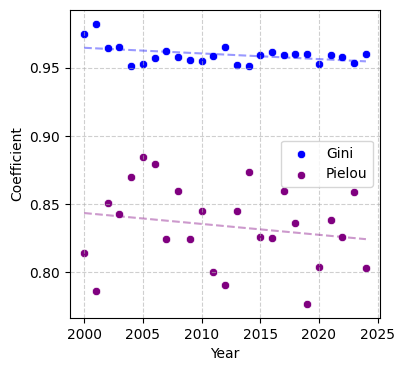

In [14]:
from scipy.stats import linregress
import seaborn as sns

combined_df = pd.merge(gini_df, shannon_df, on='Year', how='inner')
combined_df.rename(columns={'Gini_Coefficient': 'Gini', 'Shannon_Diversity_Index': 'Shannon', 'Pielou_Evenness': 'Pielou'}, inplace=True)

fig, ax = plt.subplots(figsize=(4, 4))

#colors = {'Gini': 'blue', 'Pielou': 'purple', 'Shannon': 'red'}
colors = {
    'Gini': 'blue',
    'Pielou': 'purple'
}


for col, color in colors.items():
    sns.scatterplot(x=combined_df['Year'], y=combined_df[col], label=col, color=color, ax=ax)
    slope, intercept, r_value, p_value, std_err = linregress(combined_df['Year'], combined_df[col])
    reg_line = combined_df['Year'] * slope + intercept
    y_pred = combined_df['Year'] * slope + intercept
    residuals = combined_df[col] - y_pred
    std_dev = np.std(residuals)
    ax.plot(combined_df['Year'], reg_line, color=color, linestyle='--', alpha=0.4)
    # ax.fill_between(combined_df['Year'], reg_line - std_dev, reg_line + std_dev, color=color, alpha=0.2)
    r_squared = r_value ** 2
    t_stat = slope / std_err
    # Y=β0+β1*X+ϵ
    print(f'Case {col}:')
    print(f'Y=β0+β1*X+ϵ = {intercept} + {slope} X + {std_err}')
    print(f'Stats: slope={slope}, t={t_stat}, p={p_value} -> the model explains {r_squared*100}% of the variance')
    
    last_x = combined_df['Year'].max()
    last_y = last_x * slope + intercept  # Compute last Y point
    #ax.text(last_x, last_y, f'p={p_value:.4f}', fontsize=10, color=color, ha='left', va='bottom', fontweight='bold')

ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Coefficient', fontsize=10)

plt.grid(True, linestyle='--', alpha=0.6)

if save_figs_flag:
    plt.savefig("figs/gini_pielou.pdf", format="pdf", bbox_inches="tight", dpi=300)

plt.show()

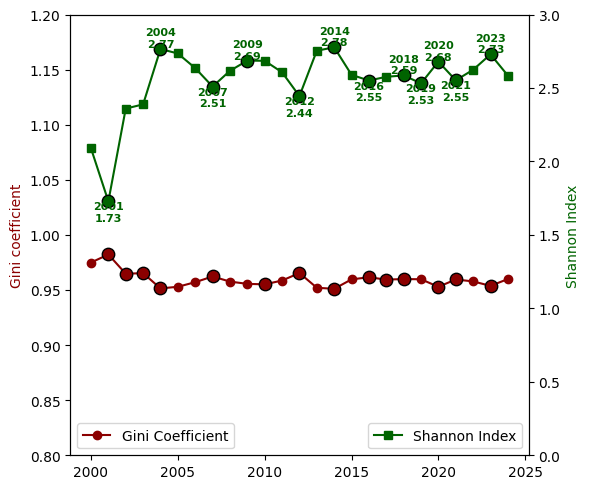

In [15]:
import scipy.signal

def find_extrema(series):
    maxima = scipy.signal.argrelextrema(series.values, np.greater)[0]  # Peaks
    minima = scipy.signal.argrelextrema(series.values, np.less)[0]  # Dips
    return series.iloc[maxima], series.iloc[minima]

gini_peaks, gini_dips = find_extrema(combined_df.set_index('Year')['Gini'])
shannon_peaks, shannon_dips = find_extrema(combined_df.set_index('Year')['Shannon'])


fig, ax1 = plt.subplots(figsize=(6, 5))

ax1.plot(combined_df['Year'], combined_df['Gini'], 
         color='darkred', marker='o', label='Gini Coefficient')
#ax1.set_title('Diversity Indices with Peaks and Dips', fontsize=14)
for series, color, label in [(gini_peaks, 'darkred', 'Gini Peak'), 
                              (gini_dips, 'darkred', 'Gini Dip')]:
    for year, value in series.items():
        ax1.scatter(year, value, color=color, s=80, edgecolors='black', zorder=3)  # Highlight points
        #ax1.text(year, value, f"{year}\n{value:.2f}", fontsize=10, 
        #         ha='center', va='bottom' if 'Peak' in label else 'top', 
        #         color=color, fontweight='bold')
ax1.set_ylabel('Gini coefficient', fontsize=10, color='darkred')
ax1.set_ylim([0.8, 1.2])


ax2 = ax1.twinx()
ax2.plot(combined_df['Year'], combined_df['Shannon'], 
         color='darkgreen', marker='s', label='Shannon Index')

for series, color, label in [(shannon_peaks, 'darkgreen', 'Shannon Peak'), 
                              (shannon_dips, 'darkgreen', 'Shannon Dip')]:
    for year, value in series.items():
        ax2.scatter(year, value, color=color, s=80, edgecolors='black', zorder=3)  # Highlight points
        ax2.text(year, value, f"{year}\n{value:.2f}", fontsize=8, 
                 ha='center', va='bottom' if 'Peak' in label else 'top', 
                 color=color, fontweight='bold')

ax2.set_ylabel('Shannon Index', fontsize=10, color='darkgreen')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim([0, 3])

ax1.legend(loc='lower left')
ax2.legend(loc='lower right')
plt.tight_layout()
if save_figs_flag:
    plt.savefig("figs/local_variations_gini_shannon.pdf", format="pdf", bbox_inches="tight")
plt.show()



A dip in Shannon and a peak in Gini suggests increasing concentration / decreasing diversity.
- 2001, 2007, 2012, 2021, and potentially 2024

A peak in Shannon and a dip in Gini suggests decreasing concentration / increasing diversity.
- 2004, 2014, 2018, 2020, 2023


## Network analysis
Analyze the co-authorship or affiliation networks for geographic and institutional diversity. We use bipartite networks to understand the relationship between authors and affiliations. 

In [16]:
import networkx as nx
from pyvis.network import Network

edges = []
for _, row in df.iterrows():
    authors = row['Authors'].split(';')  # Split authors
    countries = row['Affiliation country'].split(',')  # Split country codes
    for author, country in zip(authors, countries):
        edges.append((author.strip(), country.strip()))  # Add edges between authors and countries

B = nx.Graph()
B.add_edges_from(edges)
authors = {node for node, degree in B.degree if any(node in edge for edge in edges)}
countries = set(B) - authors

# compute centrality and node sizes
degree_centrality = nx.degree_centrality(B)
node_size = {node: degree_centrality[node] * 50 for node in B.nodes}  # Scale size for Pyvis
country_size = {node: degree_centrality[node] * 100 for node in countries}  # Larger size for countries

net = Network(notebook=True, height="800px", width="100%", bgcolor="#222222", font_color="white", cdn_resources='in_line')
net.force_atlas_2based(gravity=-1000, central_gravity=0.01, spring_length=100, spring_strength=0.01, damping=0.1) 

for node in B.nodes:
    color = "lightblue" if node in authors else "darkblue"  
    size = node_size.get(node, 5) + 5 
    if node in countries:
        size = country_size.get(node, 100) + 30  
        color = "lightgreen"  # Change country color for contrast

    net.add_node(
        node, 
        label=node, 
        size=size, 
        color=color,
        title=f"Node: {node}"  # Hover tooltip with node name
    )


for edge in B.edges:
    net.add_edge(*edge, color="lightblue", width=0.5)
# net.show("author_country_network.html")
net.write_html("author_country_network.html")

In [17]:
communities = nx.community.louvain_communities(B, seed=1987)
all_authors = df['Authors'].dropna().str.split(';').explode().str.strip().unique().tolist()

# Print the communities
print("Louvain Communities:")
cnt_single = 0
cnt_multi = 0
for i, comm in enumerate(communities):
    
    this_country = [_ for _ in comm if _ in all_ismir]
    th_authors = [_ for _ in comm if _ in all_authors]
    if len(this_country) > 1:
        print('-----------------------------------------------')
        print('------------Inter-country community------------')
        print('-----------------------------------------------')
        print(f'Community {this_country}:\n{th_authors}')
        cnt_multi += 1
    else:
        cnt_single += 1
    
    
    # print(f'Community {this_country}:\n{th_authors}')
print('-----------------------------------------------')
print('--------------------SUMMARY--------------------')
print('-----------------------------------------------')
print(f'Single-country communities: {cnt_single}/{i} ({cnt_single/i*100}%)')
print(f'Multi-country communities: {cnt_multi}/{i} ({cnt_multi/i*100}%)')
        


Louvain Communities:
-----------------------------------------------
------------Inter-country community------------
-----------------------------------------------
Community ['URY', 'ESP']:
['Mateu Sbert', 'Pau Torras', 'Luis Joglar-Ongay', 'Enric Plaza', 'Owen Meyers', 'Martin Kaltenbrunner', 'Álvaro Torrente', 'David García', 'Martín Serrano', 'Antonio Pertusa', 'Agustín Martorell', 'Vsevolod Eremenko', 'Otto Wüst', 'Luis Jure', 'Joan Serrà', 'Lorenzo J. Tardón', 'Teresa Delgado-Sánchez', 'Lorenzo Porcaro', 'Víctor Núñez-Tarifa', 'Robert Kaye', 'Francisco J. Castellanos', 'Matthew Prockup', 'Diego Martín 0001', 'Jordi Bonada', 'Jaume Masip', 'Isabel Barbancho', 'Amaury Hazan', 'Joan Serra', 'Carlos Peñarrubia', 'Viviana De La Vega', 'Justin Salamon', 'Lei Kang', 'Stefan Kersten', 'Antonio S. Pena', 'Georgi Dzhambazov', 'Miguel Molina-Solana', 'Genís Plaja-Roglans', 'Erik M. Schmidt', 'Pedro González-Barrachina', 'Emilia Gomez', 'Simone Sammartino', 'José Miguel Díaz-Báñez', 'Carlos 

It seems that very few affiliations are able to trascend single-country communities. Moreover, most of the multi-country communities are very focused in Europe: Romania-Finland, Estonia-Cyprus-Netherlands, Denmark-Norway-Portugal , Italy-Austria, Poland-Great Britain, Czech Republic-Switzerland.

Other communities that are not as western-centered are Uruguay-Spain, Turkey-Norway-United Arab Emirates-Portugal-Sweden, China-Hong Kong.

# Wordclouds

This could be related more to general topics as discussed by Perfecto Herrera in his PhD Thesis:
- 2000-2004: age of feature extractors
- 2004-2009: age of semantic content
- 2009-2014: age of context-aware systems
- 2014-today: age of creative systems


In [18]:
# Define time periods
time_ranges = [(2000, 2004), (2004, 2009), (2009, 2014), (2014, 2025)]
un_cat = pd.read_csv("data/UN_categorization.csv")[['ISO Code', 'Location 1']]
iso_to_category = dict(zip(un_cat['ISO Code'], un_cat['Location 1']))

def map_countries_to_categories(iso_list):
    return ', '.join([iso_to_category.get(iso.strip(), 'Unknown') for iso in iso_list.split(',')])


df['Location'] = df['Affiliation country'].apply(map_countries_to_categories)

In [19]:
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

custom_stopwords = set(['music', 'audio', 'using', 'musical', 'retrieval', 'analysis', 'based', 'automatic', 'information'])
stopwords = STOPWORDS.union(custom_stopwords)

texts = []
for start, end in time_ranges:
    texts.append(' '.join(df[(df['Year'] >= start) & (df['Year'] < end)]['Title'].dropna().tolist()))

region_colors = {
    'Asia': 'purple', 
    'Latin America': 'orange', 
    'Commonwealth of Independent States and Georgia': 'brown',
    'Developed Asia and Pacific': 'green', 
    'Northern America': 'red', 
    'Europe': 'blue', 
    'Unknown': 'gray', 
}

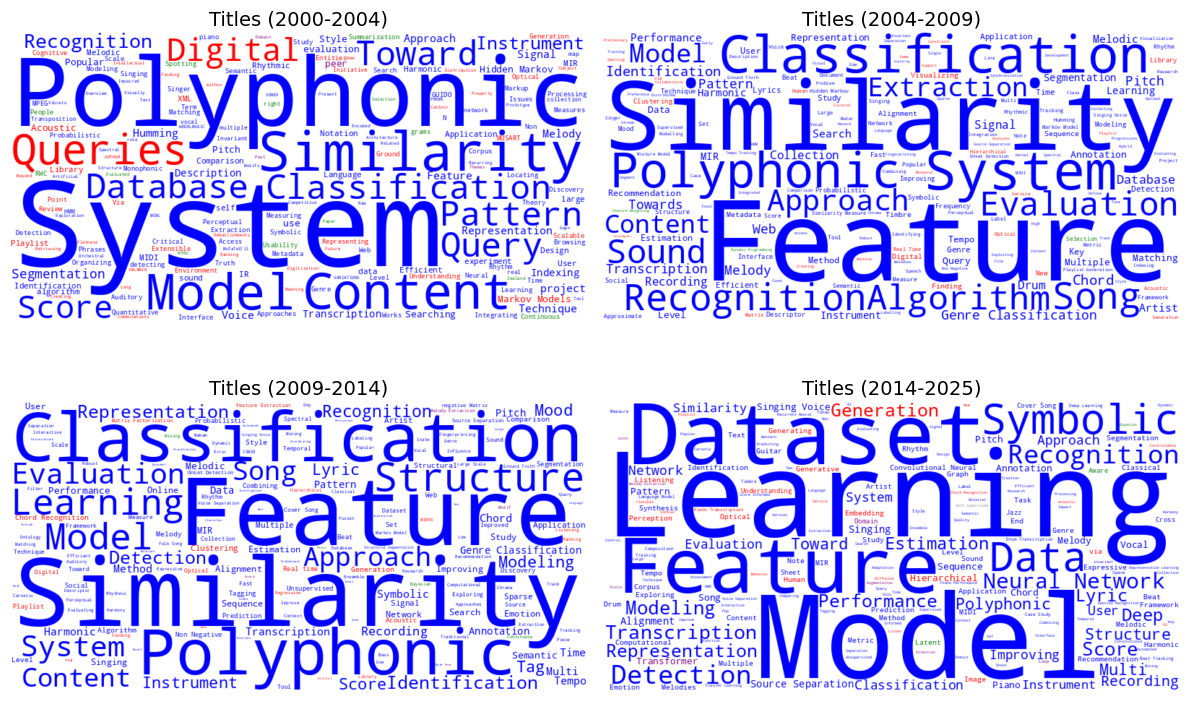

In [20]:
def get_region_color(word, df):
    locations = df[df['Title'].str.contains(word, case=False, na=False)]['Location'].dropna()
    all_regions = [region.strip() for loc in locations for region in loc.split(',')]
    if all_regions:
        most_common_region = Counter(all_regions).most_common(1)[0][0]
    else:
        most_common_region = "Unknown"
    return region_colors.get(most_common_region, "gray")

all_regions_flat = [region.strip() for loc in df['Location'].dropna() for region in loc.split(',')]
region_frequencies = Counter(all_regions_flat)
max_region_freq = max(region_frequencies.values())  # For normalization

def get_region_color_and_size(word, df):
    locations = df[df['Title'].str.contains(word, case=False, na=False)]['Location'].dropna()
    all_regions = [region.strip() for loc in locations for region in loc.split(',')]

    if all_regions:
        most_common_region = Counter(all_regions).most_common(1)[0][0]
    else:
        most_common_region = "Unknown"

    color = region_colors.get(most_common_region, "gray")

    region_freq = region_frequencies.get(most_common_region, 1)
    size_multiplier = (max_region_freq / region_freq) ** 0.2  # Increase size for rarer regions

    return color, size_multiplier


def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    color, size_multiplier = get_region_color_and_size(word, df)
    return color

# Generate word clouds with controlled placement
def generate_custom_wordcloud(text, df, vertical_position):
    def custom_position_func(word, font_size, position, orientation, random_state=None, **kwargs):
        return (random.randint(0, 800), vertical_position + random.randint(-10, 10))

    wordcloud = WordCloud(
        width=800, height=400, background_color='white', stopwords=stopwords,
        color_func=lambda word, **kwargs: get_region_color_and_size(word, df),
        prefer_horizontal=1.0, 
        relative_scaling=0.5
    ).generate(text)

    #wordcloud.recolor(color_func=lambda word, **kwargs: get_region_color_and_size(word, df))  
    wordcloud.recolor(color_func=custom_color_func)

    return wordcloud

wordclouds = []
for i, text in enumerate(texts):
    vertical_pos = int((i + 1) * 400 / len(time_ranges))  # Spread across y-axis
    wordclouds.append(generate_custom_wordcloud(text, df, vertical_pos))

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.imshow(wordclouds[i], interpolation='bilinear')
    ax.set_title(f"Titles ({time_ranges[i][0]}-{time_ranges[i][1]})", fontsize=14)
    ax.axis("off")

plt.tight_layout()
plt.show()

# N-gram Analysis for Developing Economies and Economies in Transition

Analysis of research topics (n-grams) from papers by authors affiliated with developing economies and economies in transition (according to UN categorization). This helps understand the research focus and priorities in these regions.

In [21]:

import re
from collections import Counter

def extract_ngrams(text, n=2):
    """Extract n-grams from text, matching the JavaScript implementation in the embeddings view."""
    stop_words = {
        'and', 'or', 'the', 'a', 'an', 'in', 'on', 'at', 'to', 'for', 'of', 'with',
        'that', 'this', 'from', 'audio', 'musical', 'using', 'model', 'paper',
        'which', 'results', 'automatic', 'data', 'based', 'models',  
        'approach', 'modeling', 'song', 'system', 'towards', 
        'analysis', 'method', 'algorithm', 'feature', 'features'
    }

    # N-grams to filter out (meaningless phrases)
    stop_ngrams = {
        # Common meaningless bi-grams
        'for music', 'music for', 'of music', 'music of', 'in music', 'music in',
        'to music', 'music to', 'with music', 'music with', 'and music', 'music and',
        'information retrieval', 'retrieval information', 'retrieval system', 'system retrieval',
        'music retrieval', 'retrieval music', 'audio retrieval', 'retrieval audio',
        'music information', 'information music', 'audio information', 'information audio',
        'music system', 'system music', 'audio system', 'system audio',
        'music analysis', 'analysis music', 'audio analysis', 'analysis audio',
        'classification music', 'audio classification', 'classification audio',
        'music detection', 'detection music', 'audio detection', 'detection audio',
        'music recognition', 'recognition music', 'audio recognition', 'recognition audio',
        'music research', 'research music', 'audio research', 'research audio',
        'music paper', 'paper music', 'audio paper', 'paper audio',
        'music work', 'work music', 'audio work', 'work audio',
        'music task', 'task music', 'audio task', 'task audio',
        # Common tri-grams  
        'music information retrieval', 'information retrieval music', 'retrieval music information',
        'audio information retrieval', 'information retrieval audio', 'retrieval audio information',
        'music information system', 'information system music', 'system music information',
        'audio information system', 'information system audio', 'system audio information',
        'automatic music recognition', 'music recognition automatic', 'recognition automatic music',
        'automatic audio recognition', 'audio recognition automatic', 'recognition automatic audio',
        'content based music', 'based music content', 'music content based',
        'content based audio', 'based audio content', 'audio content based',
        'machine learning music', 'learning music machine', 'music machine learning',
        'machine learning audio', 'learning audio machine', 'audio machine learning',
        'deep learning music', 'learning music deep', 'music deep learning',
        'deep learning audio', 'learning audio deep', 'audio deep learning',
        'neural network music', 'network music neural', 'music neural network',
        'neural network audio', 'network audio neural', 'audio neural network',
        # Additional common patterns
        'representations for', 'from polyphonic', 'song identification', 'tracking with', 
        'for contentbased', 'matrix factorization', 'exploring the', 'networks for', 'end end'
    }

    # Clean and split text into words (match JavaScript exactly)
    words = re.sub(r'[^\w\s]', ' ', text.lower()).split()
    words = [word for word in words if len(word) > 2 and word not in stop_words]

    # Generate n-grams
    ngrams = []
    if len(words) >= n:
        for i in range(len(words) - n + 1):
            ngram = words[i:i + n]
            ngram_text = ' '.join(ngram)
            
            # Filter out meaningless n-grams
            if ngram_text not in stop_ngrams:
                ngrams.append(ngram_text)

    return ngrams

def extract_keywords(text):
    """Extract both bi-grams and tri-grams."""
    bigrams = extract_ngrams(text, 2)
    trigrams = extract_ngrams(text, 3)
    return bigrams + trigrams

# Test the function
sample_title = "Deep Learning for Music Information Retrieval and Analysis"
sample_keywords = extract_keywords(sample_title)
print("Sample title:", sample_title)
print("Extracted keywords:", sample_keywords)


Sample title: Deep Learning for Music Information Retrieval and Analysis
Extracted keywords: ['deep learning', 'learning music', 'learning music information']
